### **Επέκταση της μεθόδου Newton για την επίλυση εξισώσεων μίας μεταβλητής**





Καλούμαστε να βρούμε λύση της εξίσωσης:
$$
f(x) = 0
$$

Η συνάρτηση $f$ εκφράζεται μέσω της σειράς Taylor γύρω από ένα $x_0$ ως:

$$
f(x) \approx \sum_{n=0}^{N} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n
$$


Επιλέγοντας $N=2$, η αρχική εξίσωση γίνεται προσεγγιστικά:
$$
f(x_0) + f'(x_0) (x - x_0) + \frac{f''(x_0)}{2!} (x - x_0)^2 = 0
$$

Επειδή θέλουμε μία επαναληπτική μέθοδο, θα την γράψουμε:

$$
f(x_k) + f'(x_k) (x_{k+1} - x_k) + \frac{f''(x_k)}{2!} (x_{k+1} - x_k)^2 = 0
$$

Η οποία γράφεται:

$$
\frac{f''(x_k)}{2}x_{k+1}^2 + (f'(x_k) - x_kf''(x_k))x_{k+1} + \
(f(x_k)-x_kf'(x_k)+x_k^2\frac{f''(x_k)}{2}) = 0 \\
$$

Έχουμε, λοιπόν, δευτεροβάθμια εξίσωση ως προς $x$ και θέτουμε:

$$
α = \frac{f''(x_k)}{2} \\
β = f'(x_k) - x_kf''(x_k) \\
γ = f(x_k)-x_kf'(x_k)+x_k^2\frac{f''(x_k)}{2}
$$

Τότε, η διακρίνουσα θα είναι:

$$
Δ = β^2 - 4αγ
$$

Και τελικά οι δύο ρίζες:

$$
x_{(k+1)_1} = \frac{-β + \sqrt{Δ}}{2α}\\
x_{(k+1)_2} = \frac{-β - \sqrt{Δ}}{2α}
$$

Από αυτές τις δύο ρίζες, επιλέγουμε αυτην που είναι πιο κοντά στην $x_k$ για λόγους σταθερότητας. Δηλαδή,
αν $|x_{(k+1)_1} - x_k| < |x_{(k+1)_2} - x_k| $, θα επιλέξουμε την $x_{(k+1)_1}$, διαφορετικά την $x_{(k+1)_2}$.

Επαναλαμβάνουμε την μέθοδο, ώσπου $|x_{k+1} - x_k| < ε$, όπου $ε$ η επιθυμητή ακρίβεια.

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# χρησιμοποιούμε ενα μικρό βήμα h=10^(-5) για τον αριθμητικό υπολογισμό των παραγώγων στα ζητουμενα σημεία
def fprime(func,x):
    h = pow(10,-5)

    return ((func(x+h) - func(x)) / h)

# όμοια για την δέυτερη παράγωγο
def fprime2(func,x):
    h = pow(10,-5)
    return ((fprime(func,x+h) - fprime(func,x)) / h)

# η ραχοκοκαλιά του αλγορίθμου: υπολογίζει τις ρίζες της δευτεροβάθμιας εξισωσης (για το τρέχον x_k),
# επιλέγει την κατάλληλη και την επιστρέφει
def base(func,x0):
       a = 0.5 * fprime2(func,x0)
       b = fprime(func,x0) - x0 * fprime2(func,x0)
       c = func(x0) - x0 * fprime(func,x0) + 0.5 * pow(x0,2) * fprime2(func,x0)

       disc = pow(b,2) - 4*a*c

       if disc < 0: # για αρνητική διακρίνουσα η μέθοδος αδυνατεί να προχωρήσει, συνήθως αυτό απορρέει από κακή αρχική εικασία x_0
        print("Αδυναμία υπολογισμού ρίζας. Χρησιμοποιήστε καλύτερη αρχική εκτίμηση ή διαφορετική μεθοδο.")
        return 1000 # επιστρέφουμε έναν διαγνωστικό αριθμό σφάλματος

       paronomastis = 2*a

       arithmitis1 = -b + math.sqrt(disc)
       arithmitis2 = -b - math.sqrt(disc)

       root1 = arithmitis1 / paronomastis
       root2 = arithmitis2 / paronomastis

      # επιλέγουμε την ρίζα η οποία κατα απόλυτη τιμή βρισκεται πιο κοντά στο προηγούμενο x, για καλύτερη σταθερότητα και σύγκλιση
       if (abs(root1 - x0) < abs(root2 - x0)):
            return root1
       else:
            return root2


arr = []
e = pow(10,-5) # επιθυμητό σφάλμα

# καλεί αναδρομικά τη συνάρτηση base
def method(func,x0):
    arr.clear()
    epanalipsi = 1
    arr.append(abs(x0)) # αποθηκεύουμε όλα τα x σε έναν μονοδιάστατο πίνακα (θα μας χρειαστεί στη συνέχεια)

    while ((abs(base(func,x0) - x0)) > e): # η λούπα εκτελείτε όσο τα επιμέρους διαδοχικά x διαφέρουν πάνω από το επιθυμητό σφάλμα
        if x0 == 1000: # αν προέκυψε το σφάλμα στην διακρίνουσα, τερματισμός του προγράμματος
            break

        x0 = base(func,x0)
        arr.append(x0)

        print(f'Επανάληψη {epanalipsi}: {x0}')
        epanalipsi += 1

**Πρώτη** εξίσωση που θα λύσουμε θα ειναι η:

$$
x^2 - x - 2 = 0
$$
Με ρίζες:$\hspace{0.5cm}r_1 = -1, \hspace{0.5cm} r_2 = 2$

Χρησιμοποιώντας την μέθοδο μας για ακρίβεια $ε=10^{-5}$ και αρχικη τιμη $x_0 = 0$ χρειαστήκαμε 1 επαναλήψη. $$$$ Παρακάτω παρουσιάζεται ο κώδικας, η προσεγγιστική ρίζα για κάθε επανάληψη και το αντίστοιχο ζητούμενο διάγραμμα.

Επανάληψη 1: -1.0000033057584958


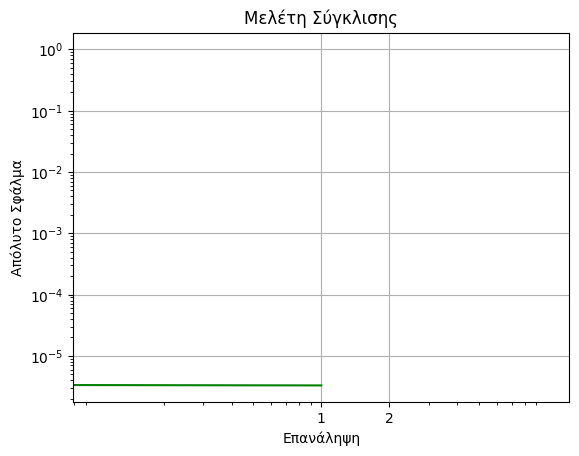

In [ ]:
def f1(x):
    return pow(x,2) - x - 2

method(f1,0)

r = -1 # πραγματική ρίζα

arr2 = [abs(arr[i] - r) for i in range(len(arr))] # το απόλυτο σφάλμα, για κάθε x_k.

plt.plot(range(len(arr2)),arr2, color='green') # διάγραμμα με άξονες x, y τις επαναλήψεις και το απόλυτο σφάλμα αντίστοιχα.
plt.xlabel('Επανάληψη')
plt.ylabel('Απόλυτο Σφάλμα')
plt.title('Μελέτη Σύγκλισης')

plt.xscale('log') #λογαριθμική κλίμακα
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter()) # εμφάνιση αριθμών στον x άξονα σε κανονική γραφή, αντί της επιστημονικής
max_ticks = len(arr2)
plt.xticks(range(1, max_ticks + 1)) # εμφάνιση αριθμών στον x άξονα σε ακέραια μορφή

plt.grid(True)
plt.show()

**Δεύτερη** εξίσωση που θα λύσουμε θα ειναι η:

$$
e^x + x - 4 = 0
$$
Με ρίζα:$\hspace{0.5cm}r=1.0737$

Χρησιμοποιώντας την μέθοδο μας για ακρίβεια $ε=10^{-5}$ και αρχικη τιμη $x_0 = 1.5$ χρειαστήκαμε 2 επαναλήψεις.$$$$ Παρακάτω παρουσιάζεται ο κώδικας, η προσεγγιστική ρίζα για κάθε επανάληψη και το αντίστοιχο ζητούμενο διάγραμμα.

Επανάληψη 1: 1.0589831214598022
Επανάληψη 2: 1.0737292764006277


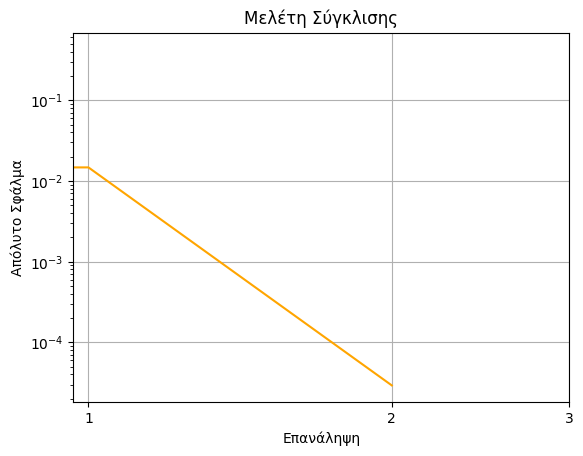

In [ ]:
def f2(x):
    return math.exp(x) + x - 4

method(f2,1.5)

r = 1.0737

arr2 = [abs(arr[i] - r) for i in range(len(arr))]

plt.plot(range(len(arr2)), arr2, color='orange')
plt.xlabel('Επανάληψη')
plt.ylabel('Απόλυτο Σφάλμα')
plt.title('Μελέτη Σύγκλισης')

plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
max_ticks = len(arr2)
plt.xticks(range(1, max_ticks + 1))

plt.grid(True)
plt.show()

**Τρίτη** εξίσωση που θα λύσουμε θα ειναι η:

$$
x^4-4x-1=0
$$
Με ρίζα:$\hspace{0.5cm}r=1.6632$

Χρησιμοποιώντας την μέθοδο μας για ακρίβεια $ε=10^{-5}$ και αρχικη τιμη $x_0 = 1$ χρειαστήκαμε 3 επαναλήψεις.$$$$ Παρακάτω παρουσιάζεται ο κώδικας, η προσεγγιστική ρίζα για κάθε επανάληψη και το αντίστοιχο ζητούμενο διάγραμμα.

Επανάληψη 1: 1.8164833889145904
Επανάληψη 2: 1.661408889342462
Επανάληψη 3: 1.6632519204225507


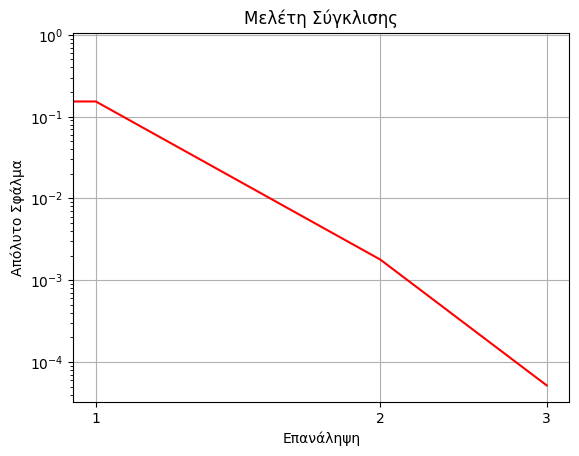

In [ ]:
def f3(x):
    return pow(x,4) -4*x -1

method(f3,1)

r = 1.6632

arr2 = [abs(arr[i] - r) for i in range(len(arr))]

plt.plot(range(len(arr2)),arr2, color='red')
plt.xlabel('Επανάληψη')
plt.ylabel('Απόλυτο Σφάλμα')
plt.title('Μελέτη Σύγκλισης')

plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()

**Τέταρτη** εξίσωση που θα λύσουμε θα ειναι η:

$$
\ln x+\cos x-2=0
$$
Με ρίζα:$\hspace{0.5cm}r=5.0935$

Χρησιμοποιώντας την μέθοδο μας για ακρίβεια $ε=10^{-5}$ και αρχικη τιμη $x_0 = 4$ χρειαστήκαμε 3 επαναλήψεις.$$$$ Παρακάτω παρουσιάζεται ο κώδικας, η προσεγγιστική ρίζα για κάθε επανάληψη και το αντίστοιχο ζητούμενο διάγραμμα.

Επανάληψη 1: 4.977992082882339
Επανάληψη 2: 5.093359744899293
Επανάληψη 3: 5.093573609307493


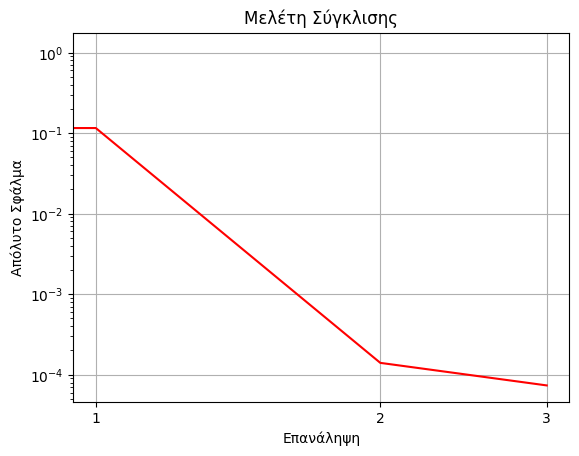

In [ ]:
def f4(x):
    return math.log(x) + math.cos(x) - 2

method(f4,4)

r = 5.0935

arr2 = [abs(arr[i] - r) for i in range(len(arr))]

plt.plot(range(len(arr2)),arr2, color='red')
plt.xlabel('Επανάληψη')
plt.ylabel('Απόλυτο Σφάλμα')
plt.title('Μελέτη Σύγκλισης')

plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()

Η παραπάνω μέθοδος αναζήτησης ρίζας εμφανίζει ποικίλα θετικά αλλά και αρνητικά χαρακτηριστικά. Πιο συγκεκριμένα:


<u>**Θετικά:**</u>


*   **Γρήγορη σύγκλιση**, άρα και λιγότερες απαιτούμενες επαναλήψεις, σε σχέση με γραμμικές μεθόδους (π.χ. μεθοδος Newton)
*   **Υψηλή ακρίβεια και χαμηλό σφάλμα**.
*   **Απλός αλγόριθμος με πολυπλοκότητα $O(n)$**, όπου $n$ είναι οι απαιτούμενες επαναλήψεις.


<u>**Αρνητικά:**</u>


*   **Υψηλή εξάρτηση από την αρχική εικασία του $x_0$**. Αν το $x_0$ απέχει σημαντικά από την πραγματική ρίζα, υπάρχει πιθανότητα η προσέγγιση Taylor να μας δώσει μία παραβολή που δε μηδενίζεται, η οποία θα έχει αρνητική διακρίνουσα, κάτι που προκαλεί σφάλμα.
*   **Προβλήματα με πολυώνυμα και εκθετικα υψηλής τάξης**. Συναρτήσεις των οποίων οι τιμές εκτοξεύονται απότομα αυξάνουν την ευαισθησία ως προς την αρχική εκτίμηση $x_0$, επιδεινώνοντας τα προαναφερθέντα θέματα.
*   **Αυξημένο υπολογιστικό κόστος** λόγω της μακροσκελούς φύσης των παραμέτρων της δευτεροβάθμιας εξίσωσης και των παραγώγων της συνάρτησης.





   





### **Ελένη και Πάρης**

Προκειμένου να μελετήσουμε τα συναισθήματα μεταξύ δύο χαρακτήρων, του Πάρη και της Ελένης, καταφεύγουμε στην επίλυση ενός συστήματος διαφορικών εξισώσεων. Συγκεκριμένα, θα επιλύσουμε με τη μέθοδο Runge - Kutta 4ου βαθμού το σύστημα:

$$
\begin{aligned}
\frac{dx}{dt} &= -αy \\
\frac{dy}{dt} &= βx - γy^2
\end{aligned}
$$

όπου η $x(t)$ εκφράζει το συναίσθημα του Πάρη για την Ελένη, η $y(t)$ εκφράζει το συναίσθημα της Ελένης
για τον Πάρη την χρονική στιγμή $t$ και τα $α, β, γ$ είναι σταθερές.
$$$$
Χρησιμοποιώντας τον παρακάτω κώδικα μπορούμε να λύσουμε το σύστημα για αρχικές συνθήκες $x(0)=2, \ y(0)=0$ και τιμές παραμέτρων $α=0.2,\ β=0.8,\ γ=0.1$ και $t \in [0, 60]$.$$$$
Παρατηρούμε, λοιπόν, ότι τα συναίσθηματα και των δύο διαρκώς ταλαντεύονται. Ωστόσο, έχοντας ορίσει τις εξείς αντιστοιχίες μεταξύ τιμών και συναισθημάτων:
* -5: Μίσος
* -2,5: Αποστροφή
* 0: Αδιαφορία
* 2,5: Συμπάθεια
* 5: Απέραντη Αγάπη

μπορούμε να εξάγουμε κάποια ενδιαφέροντα συμπεράσματα. Συγκεκριμένα:

1.   Τα συναισθήματα του Πάρη  προσεγγιστικά ταλαντεύονται μεταξύ της αδιαφορίας $(x_{min}=-0.8)$ και της συμπάθειας $(x_{max}=2)$.
2.   Τα συναισθήματα της Ελένης προσεγγιστικά ταλαντεύονται μεταξύ της αποστροφής $(y_{min}=-2.7)$ και της συμπάθειας $(y_{max}=2.7)$.
3. Η Ελένη, λοιπόν, βιώνει πιο έντονα τόσο τα θετικά, όσο και τα αρνητικά συναισθήματα (έχει μικρότερο $min$ και μεγαλύτερο $max$ από τον Πάρη). Το φάσμα συναισθημάτων της Ελένης, θα μπορούσαμε να πούμε, είναι μεγαλύτερο. Ο Πάρης μοιάζει πιο σταθερός.
4. Σημαντική είναι και η χρονική συσχέτιση των συναισθημάτων των 2 χαρακτήρων. Όταν, δηλαδή, ο Πάρης δείχνει συμπάθεια προς την Ελένη, αυτή έπειτα από λίγο χρονικό διάστημα δείχνει ακόμα μεγαλύτερη συμπάθεια προς τον Πάρη. Τότε, όμως, η συμπάθεια του Πάρη προς αυτήν αρχίζει να μειώνεται, εώς ότου φτάσει στο κατώτατό της σημείο. Αυτό προξενεί και την πτώση της συμπάθειας της Ελένης προς τον Πάρη, η οποία φτάνει μέχρι και την αποστροφή. Στον Πάρη, τότε, αρχίζει να ξαναζωντανεύει η συμπάθεια του προς την Ελένη, οπότε και φτάνει στο αρχικό σημείο της ανάλυσης μας.

   [t]      [x]      [y]
[[ 0.      2.      0.    ]
 [ 1.      1.8462  1.4808]
 [ 2.      1.4466  2.4033]
 [ 3.      0.9285  2.6849]
 [ 4.      0.4021  2.5222]
 [ 5.     -0.064   2.1077]
 [ 6.     -0.4324  1.5604]
 [ 7.     -0.6837  0.945 ]
 [ 8.     -0.8083  0.2976]
 [ 9.     -0.8021 -0.3587]
 [10.     -0.6654 -1.0042]
 [11.     -0.4026 -1.6151]
 [12.     -0.024  -2.1535]
 [13.      0.4497 -2.5505]
 [14.      0.9789 -2.6809]
 [15.      1.4913 -2.3459]
 [16.      1.873  -1.3603]
 [17.      1.9987  0.1496]
 [18.      1.8176  1.5959]
 [19.      1.4012  2.4547]
 [20.      0.8783  2.6851]
 [21.      0.3552  2.4918]
 [22.     -0.1029  2.0609]
 [23.     -0.461   1.505 ]
 [24.     -0.7008  0.8854]
 [25.     -0.8133  0.2363]
 [26.     -0.7948 -0.4199]
 [27.     -0.6461 -1.0633]
 [28.     -0.3718 -1.6694]
 [29.      0.0168 -2.1981]
 [30.      0.4977 -2.5767]
 [31.      1.029  -2.673 ]
 [32.      1.5346 -2.283 ]
 [33.      1.8974 -1.2352]
 [34.      1.9946  0.2985]
 [35.      1.7868  1.7053]
 [3

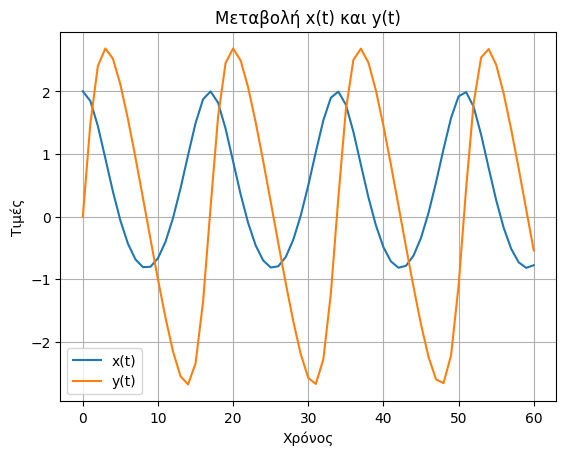

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = 0.2 # οι παράμετροι του προβλήματος
b = 0.8
c = 0.1

# η συνάρτηση της 1ης διαφορικής εξίσωσης
def f(y):
    return -a * y

# η συνάρτηση της 2ης διαφορικής εξίσωσης
def g(x,y):
    return b * x - c * pow(y,2)

# η κύρια συνάρτηση: υλοποιεί την μέθοδο Runge - Kutta και επιστρέφει έναν πίνακα με τα αποτελέσματα
def method(f,g,y_n,x_n):
    h = 1 # το βήμα μας
    t_start = 0
    t_end = 60

    N = int((t_end - t_start) / h + 1) # αριθμός επαναλήψεων

    t_values = np.linspace(t_start, t_end, N)
    results = np.zeros((N, 3)) # αρχικοποίηση πίνακα απάντησης


    for i in range(N):
        results[i, 0] = i # γέμισμα του πίνακα με τα αποτελέσματα που αντιστοιχούν σε κάθε επανάληψη
        results[i, 1] = x_n
        results[i, 2] = y_n

        k1x = h * f(y_n) # ορισμός των k που αντιστοιχούν σε κάθε μεταβλητή
        k1y = h * g(x_n,y_n)

        k2x = h * f(y_n + 0.5 * k1y)
        k2y = h * g(x_n + 0.5 * k1x, y_n + 0.5 * k1y)

        k3x = h * f(y_n + 0.5 * k2y)
        k3y = h * g(x_n + 0.5 * k2x, y_n + 0.5 * k2y)

        k4x = h * f(y_n + k3y)
        k4y = h * g(x_n + k3x, y_n + k3y)

        y_n += (1/6)*(k1y+2*k2y+2*k3y+k4y) # ενημέρωση μεταβλητών
        x_n += (1/6)*(k1x+2*k2x+2*k3x+k4x)

    return results


results = method(f, g, 0, 2) # δισδιάστατος πίνακας διαστάσεως 3 * N με τις λύσεις του συστηματος. 1η στήλη ειναι τα t, 2η και 3η οι τιμες των x και y αντίστοιχα.

np.set_printoptions(suppress=True) # συνδυάζεται με την μεθεπόμενη γραμμή κωδικα ώστε οι τιμές του πίνακα να μην εκτυπωθούν σε επιστημονική σημειογραφία
results[:, 1:] = np.around(results[:, 1:], decimals=4) # θετουμε ακρίβεια 4ου δεκαδικού στις τιμές του πίνακα
plt.ticklabel_format(style='plain')
print("   [t]      [x]      [y]")

print(results)

plt.grid(True) # εμφάνιση του πλέγματος στο γράφημα για πιο εύκολη ανάγνωση.
plt.plot(results[:, 0], results[:, 1], label='x(t)') # γράφημα της x(t) (συναίσθημα Πάρη) ως προς τον χρόνο t
plt.plot(results[:, 0], results[:, 2], label='y(t)') # γράφημα της y(t) (συναίσθημα Ελενης) ως προς τον χρόνο t
plt.xlabel('Χρόνος')
plt.ylabel('Τιμές')
plt.title('Μεταβολή x(t) και y(t)')
plt.legend()
plt.show()

Ας ερευνήσουμε, τώρα, για ποια τιμή της παραμέτρου $γ$, με τα υπόλοιπα δεδομένα σταθερά, η Ελένη θα εχει αίσθημα αδιαφορίας τη χρονική στιγμή $t=30$. Δηλαδή, θέλουμε:

$$
γ = \{ γ_s \mid y(30) \approx 0 \}
$$

Γνωρίζουμε ότι το $γ_s$ αποτελεί έναν θετικό αριθμό, αφού στην δοθείσα εξίσωση

$$
\frac{dy}{dt} =βx-γ y^2
$$
ο όρος $-γy^2$ πρέπει να ειναι αρνητικός, εφόσον μας δείχνει πόσο αρνητικά επηρεάζουν οι αϋπνίες της Ελένης τα αισθήματά της προς τον Πάρη.$$$$

Συνεπώς, μπορούμε να ξεκινήσουμε τον αλγόριθμο με $γ_0=0$ και, αυξάνοντάς το με βήμα $h=0.001$, να καλούμε αναδρομικά την μέθοδο Runge - Kutta, ώσπου να βρεθεί κατάλληλο $γ_s$ για το οποίο $y(30)\approx0$.$$$$

Όπως φαίνεται παρακάτω, έχοντας ορίσει σαν μέγιστο επιτρεπτό σφάλμα το $ε=0.01$, η διερέυνηση μάς επιστρέφει:

 $$ γ_s\approx0.251 , \ y(30)\approx -0.086$$

 Εύκολα παρατηρούμε ότι και για μικρότερο δείκτη σφάλματος $ε$ το αποτέλεσμα παραμένει πρακτικά αμετάβλητο.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = 0.2
b = 0.8
c = 0


def f(y):
    return -a * y

def g(x,y):
    return b * x - c * pow(y,2)


def method(f, g, y_n, x_n):
    h = 1
    t_start = 0
    t_end = 60

    N = int( (t_end - t_start) / h) + 1


    for i in range(N):
        k1x = h * f(y_n)
        k1y = h * g(x_n, y_n)

        k2x = h * f(y_n + 0.5 * k1y)
        k2y = h * g(x_n + 0.5 * k1x, y_n + 0.5 * k1y)

        k3x = h * f(y_n + 0.5 * k2y)
        k3y = h * g(x_n + 0.5 * k2x, y_n + 0.5 * k2y)

        k4x = h * f(y_n + k3y)
        k4y = h * g(x_n + k3x, y_n + k3y)

        if (i==30):
            return y_n # επιστρέφουμε μόνο την τιμή y(30), καθώς αυτή μας απασχολεί

        y_n += (1/6)*(k1y+2*k2y+2*k3y+k4y)
        x_n += (1/6)*(k1x+2*k2x+2*k3x+k4x)


y_30 = method(f, g, 0, 2)
e = pow(10,-2)
while (abs(y_30) > e): # η λούπα εκτελείται μέχρι να βρεθεί λύση με σφάλμα μικρότερο του e
    y_30 = method(f, g, 0, 2) # αναδρομική κλήση της μεθόδου Runge - Kutta
    c += 0.001 # το γ αυξάνεται με βήμα 0.001

print(f"Το y(30) ισούται με {y_30} για γ = {c-0.001}")

Το y(30) ισούται με -0.008576666486657059 για γ = 0.25100000000000017


### **Συντελεστές εργασίας**


*   Μπίλλης Άγγελος
*   Φιλιππίδης Χρήστος


